# Neural Network Classification

<h3> Import all the required libraries </h3>

In [1]:
#importing the required lib's
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
import warnings 
warnings.filterwarnings('ignore')

# EDA

In [2]:
#reading forestfires.csv using pandas
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [3]:
#cheacking the column and row sizes
df.shape

(517, 11)

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
size_category    0
dtype: int64

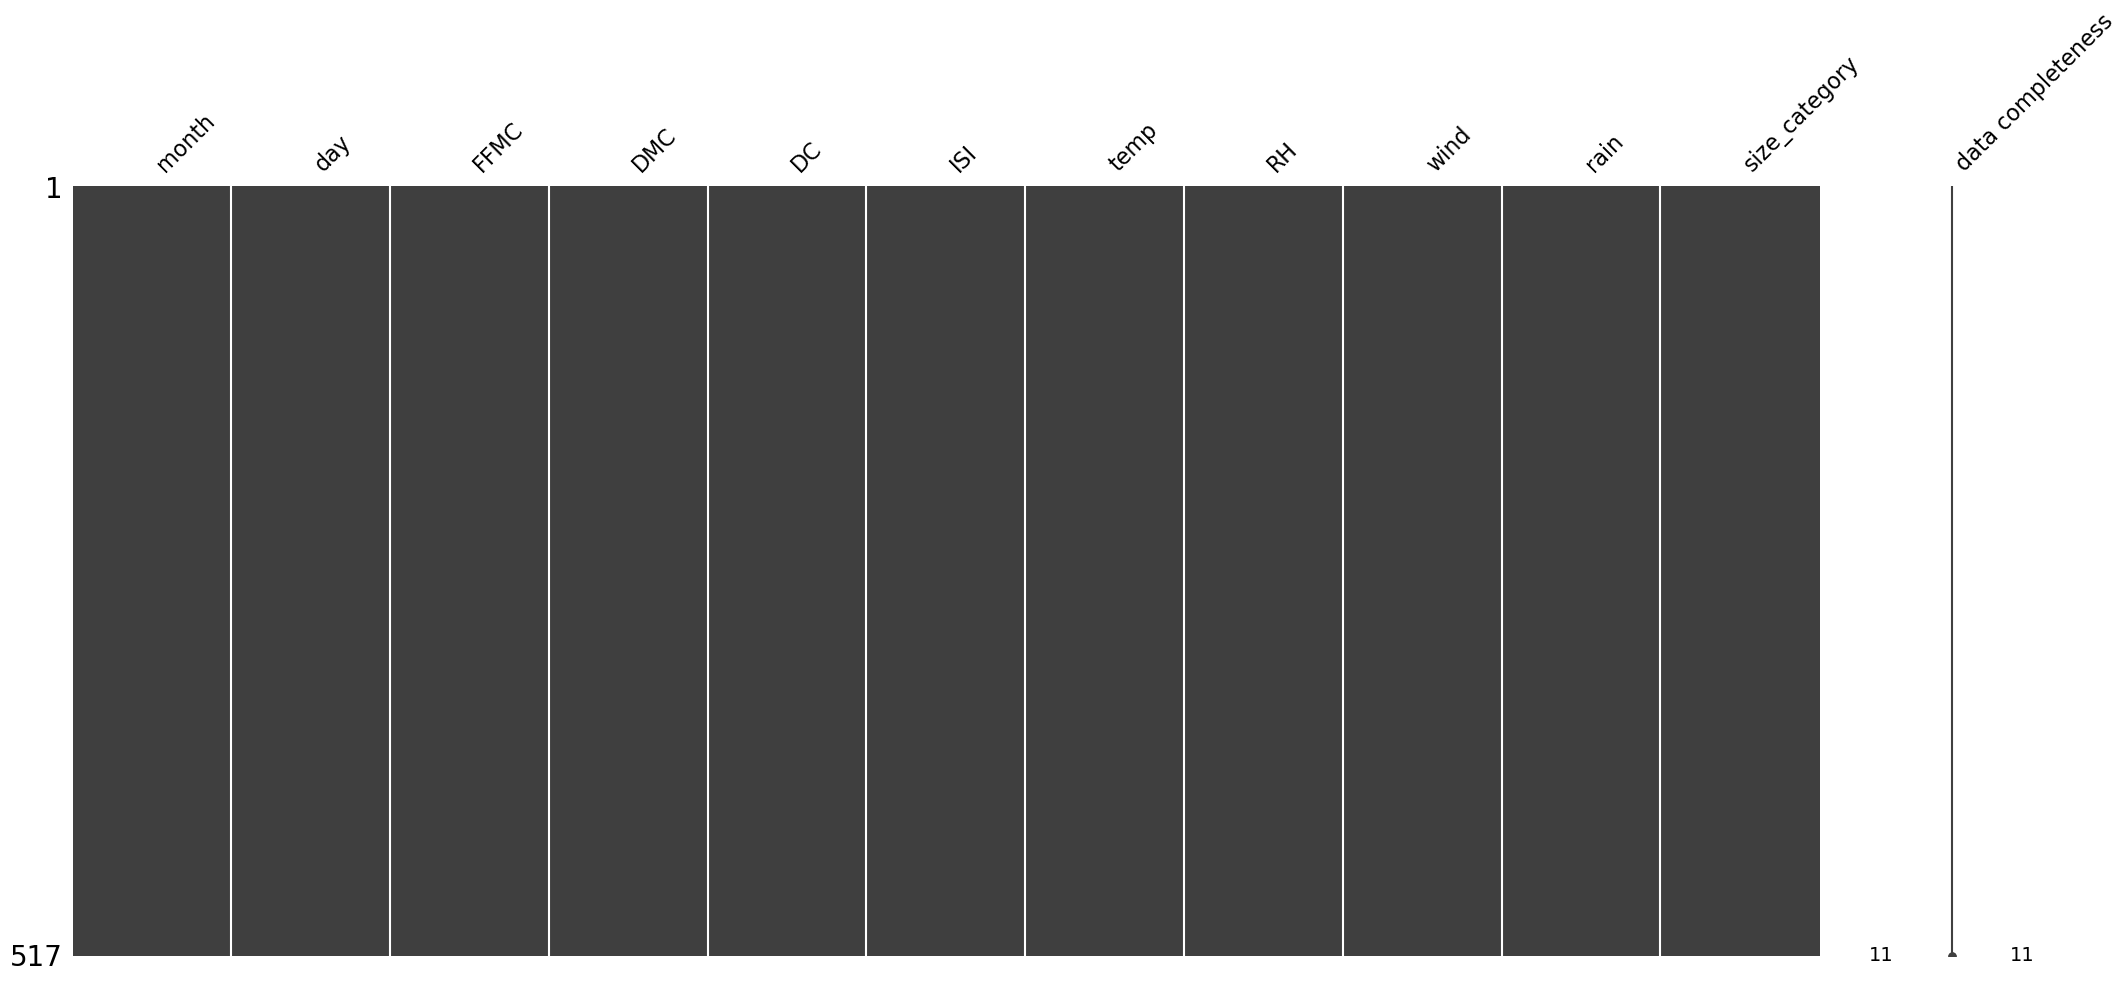

In [22]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [23]:
#different datatypes in dataframe
df.dtypes

month              int32
day                int32
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
size_category      int32
dtype: object

In [24]:
#encoding the data by using label encoder
df['month']=LabelEncoder().fit_transform(df['month'])
df['day']=LabelEncoder().fit_transform(df['day'])
df['size_category']=LabelEncoder().fit_transform(df['size_category'])

In [25]:
#finding the null values and dtypes of different variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  size_category  517 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 44.6 KB


In [26]:
#describing the overall information of variables like mean,std,min,max etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,517.0,5.758221,4.373275,0.0,1.0,6.0,11.0,11.0
day,517.0,2.736944,1.925061,0.0,1.0,3.0,4.0,6.0
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.6,92.9,96.2
DMC,517.0,110.872340,64.046482,1.1,68.6,108.3,142.4,291.3
DC,517.0,547.940039,248.066192,7.9,437.7,664.2,713.9,860.6
ISI,517.0,9.021663,4.559477,0.0,6.5,8.4,10.8,56.1
temp,517.0,18.889168,5.806625,2.2,15.5,19.3,22.8,33.3
RH,517.0,44.288201,16.317469,15.0,33.0,42.0,53.0,100.0
wind,517.0,4.017602,1.791653,0.4,2.7,4.0,4.9,9.4
rain,517.0,0.021663,0.295959,0.0,0.0,0.0,0.0,6.4


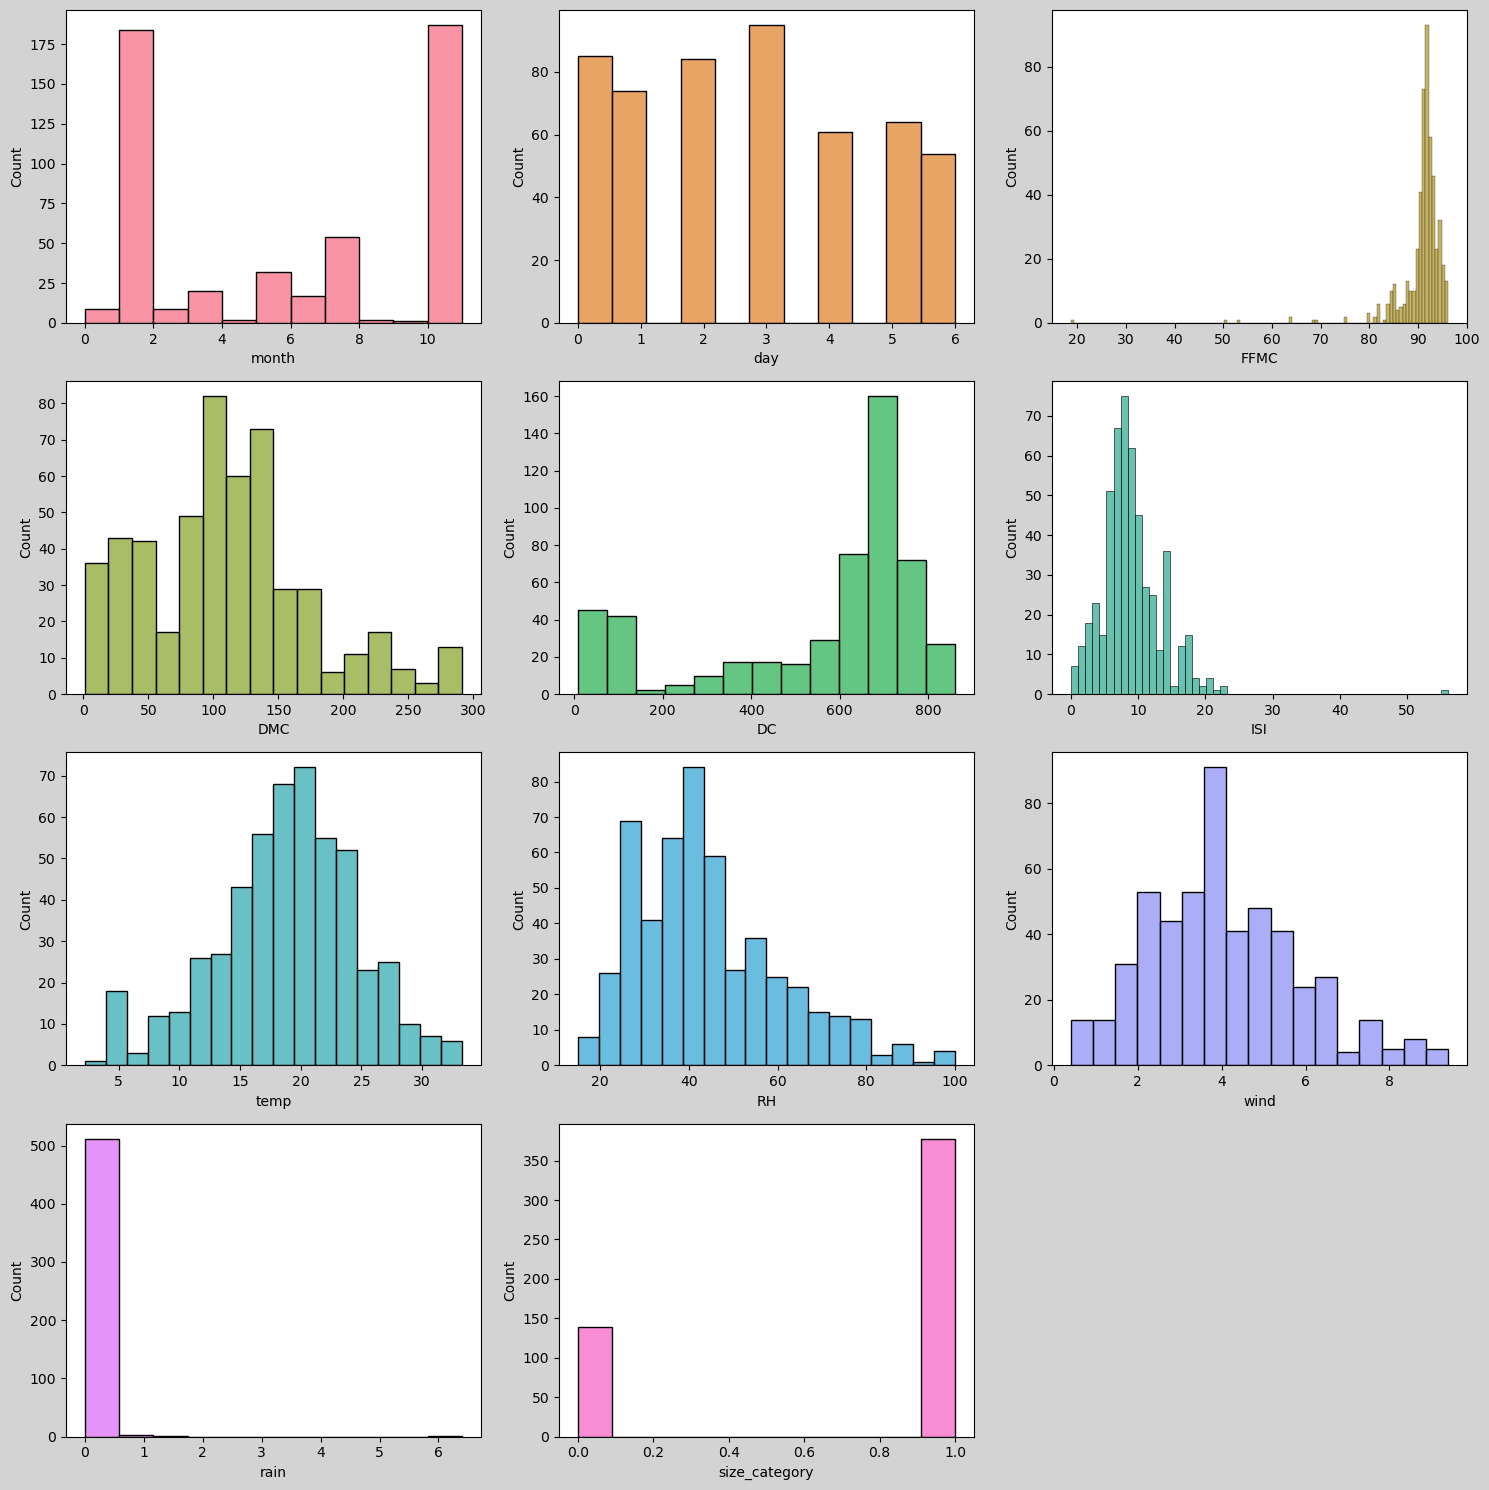

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

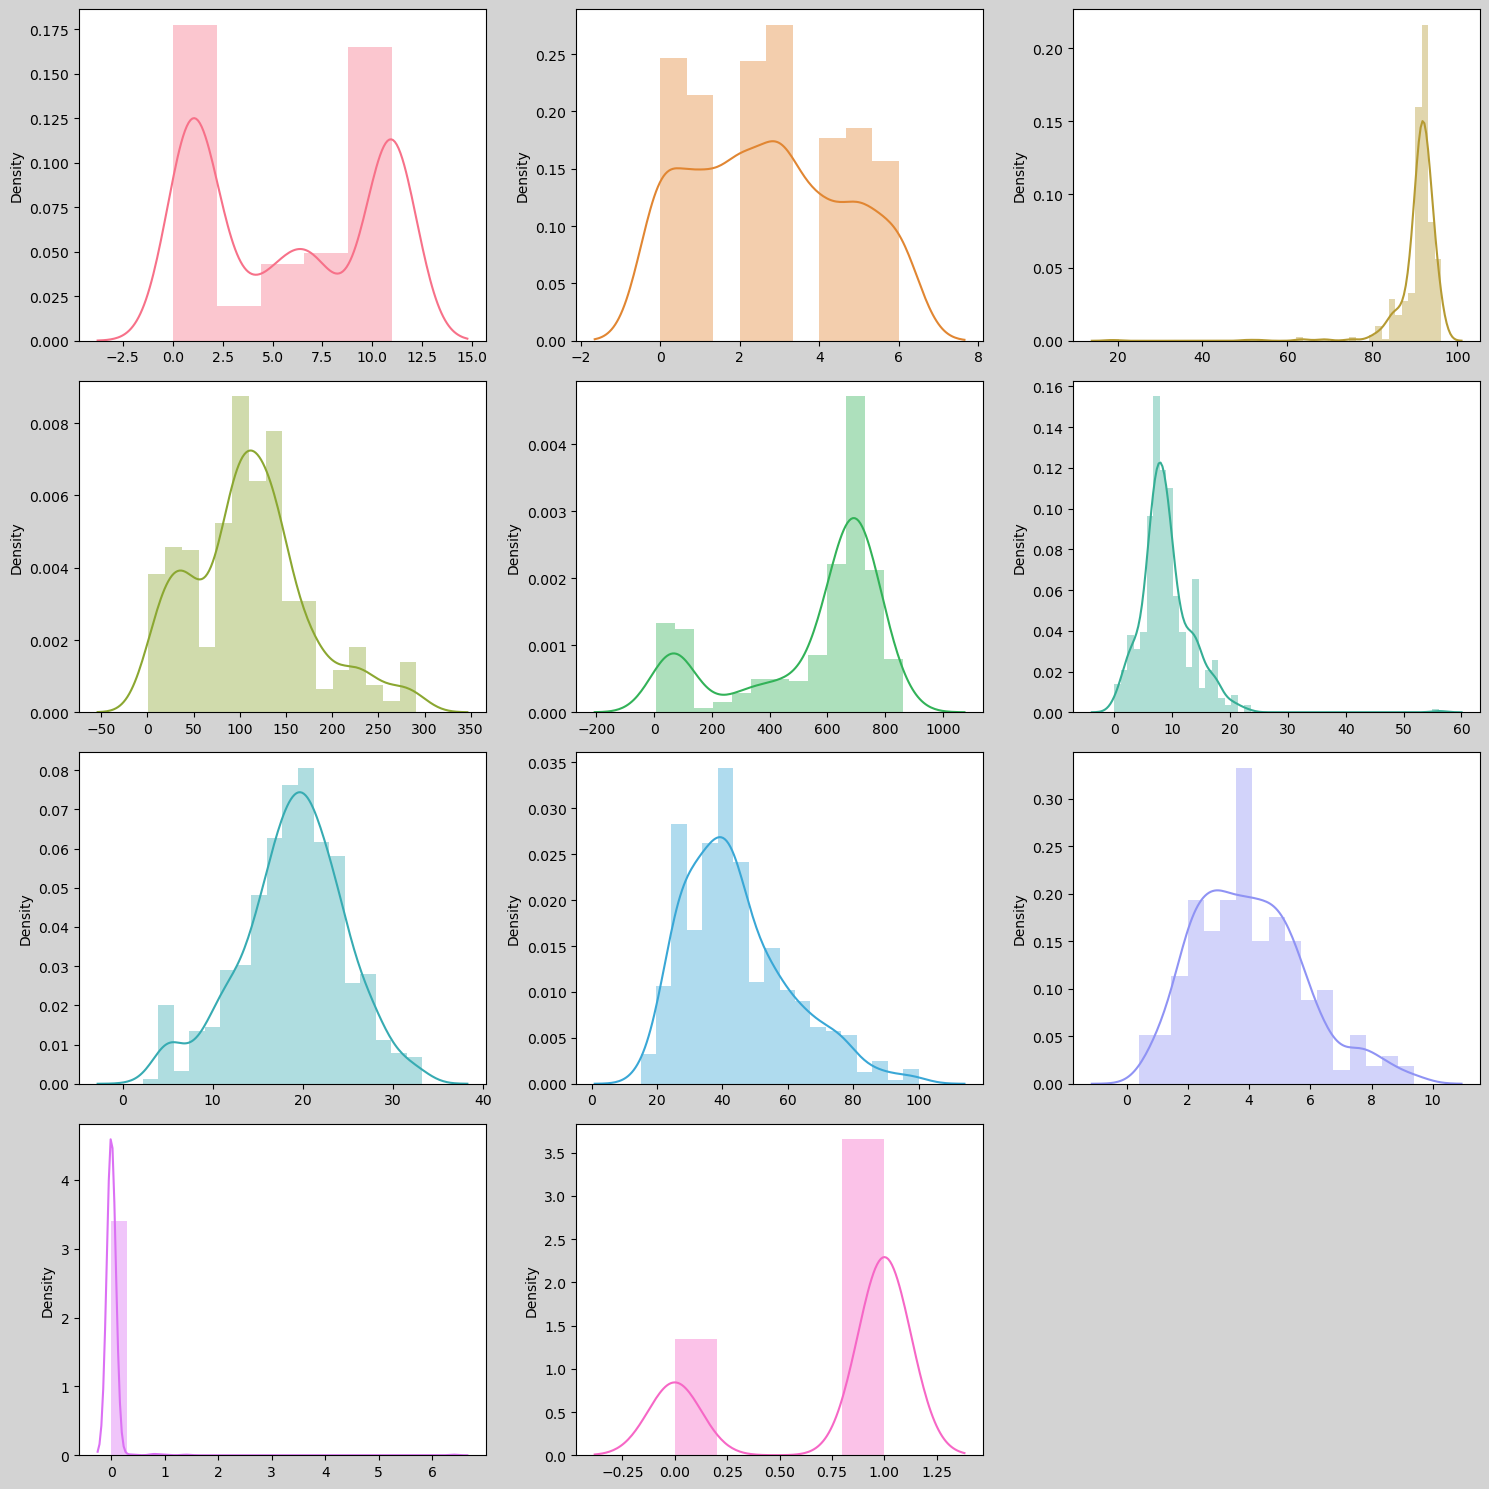

In [30]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

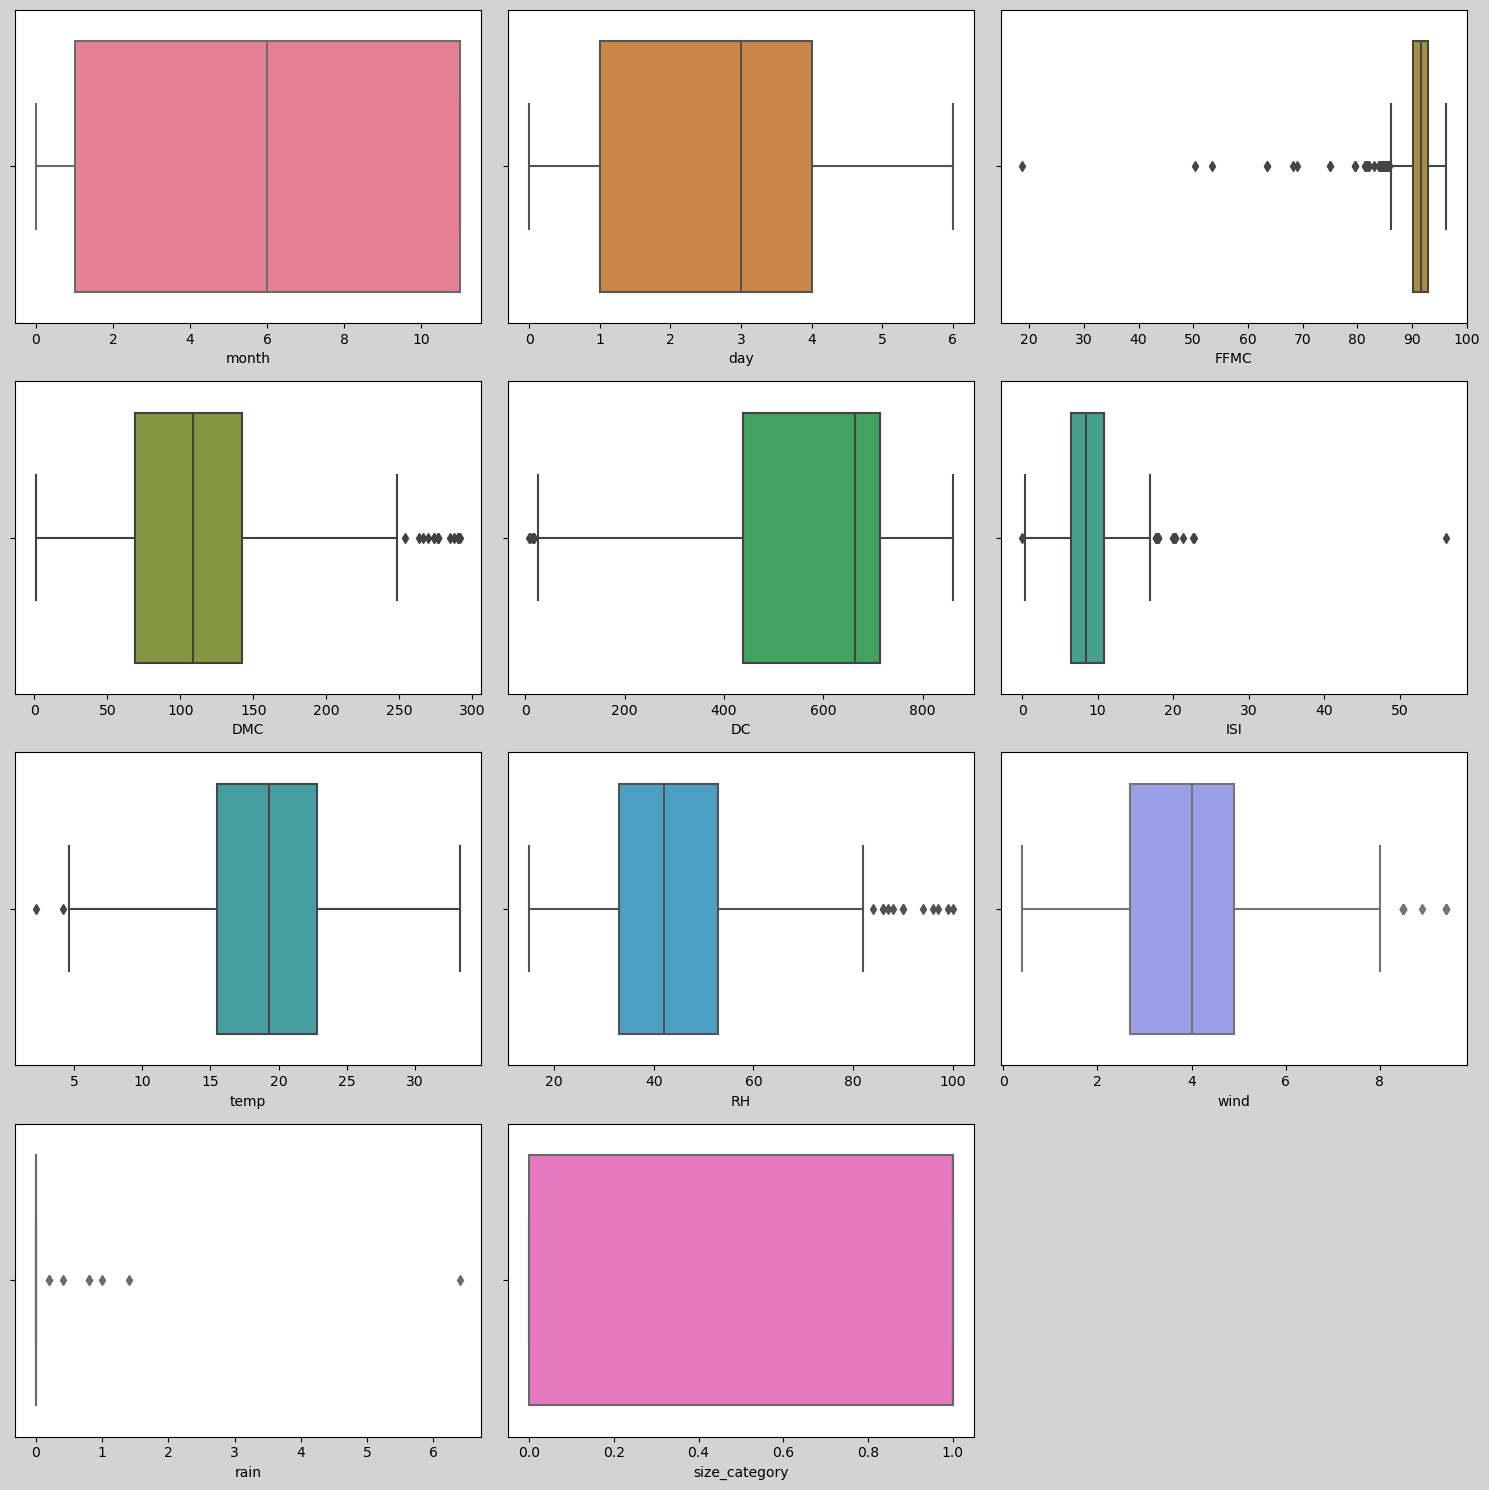

In [31]:
#performing univerent analysis
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

In [32]:
#importing minmaxscaler to scale the data
from sklearn.preprocessing import MinMaxScaler
#spling the datas based on whether they belong to independent or dependent variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
y_train.value_counts()

1    263
0     98
Name: size_category, dtype: int64

In [34]:
#spliting data as train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)

#hyper parameter tuning

In [37]:
# tuning parameters like batch_size,epoch and learning rate
def create_model(learning_rate):
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(100, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(50,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate= learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


#creating the model by defining some parameters

model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100,150]
learning_rate = [0.001,0.01,0.1]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START batch_size=10, epochs=10, learning_rate=0.001..............
[CV 1/5; 1/36] END batch_size=10, epochs=10, learning_rate=0.001;, score=0.726 total time=   5.2s
[CV 2/5; 1/36] START batch_size=10, epochs=10, learning_rate=0.001..............
[CV 2/5; 1/36] END batch_size=10, epochs=10, learning_rate=0.001;, score=0.736 total time=   1.7s
[CV 3/5; 1/36] START batch_size=10, epochs=10, learning_rate=0.001..............
[CV 3/5; 1/36] END batch_size=10, epochs=10, learning_rate=0.001;, score=0.681 total time=   2.6s
[CV 4/5; 1/36] START batch_size=10, epochs=10, learning_rate=0.001..............
[CV 4/5; 1/36] END batch_size=10, epochs=10, learning_rate=0.001;, score=0.736 total time=   1.7s
[CV 5/5; 1/36] START batch_size=10, epochs=10, learning_rate=0.001..............
[CV 5/5; 1/36] END batch_size=10, epochs=10, learning_rate=0.001;, score=0.764 total time=   1.7s
[CV 1/5; 2/36] START batch_size=10, epochs=

[CV 2/5; 10/36] END batch_size=10, epochs=150, learning_rate=0.001;, score=0.708 total time=   9.3s
[CV 3/5; 10/36] START batch_size=10, epochs=150, learning_rate=0.001............
[CV 3/5; 10/36] END batch_size=10, epochs=150, learning_rate=0.001;, score=0.667 total time=  10.4s
[CV 4/5; 10/36] START batch_size=10, epochs=150, learning_rate=0.001............
[CV 4/5; 10/36] END batch_size=10, epochs=150, learning_rate=0.001;, score=0.736 total time=   9.3s
[CV 5/5; 10/36] START batch_size=10, epochs=150, learning_rate=0.001............
[CV 5/5; 10/36] END batch_size=10, epochs=150, learning_rate=0.001;, score=0.708 total time=  10.3s
[CV 1/5; 11/36] START batch_size=10, epochs=150, learning_rate=0.01.............
[CV 1/5; 11/36] END batch_size=10, epochs=150, learning_rate=0.01;, score=0.726 total time=   9.3s
[CV 2/5; 11/36] START batch_size=10, epochs=150, learning_rate=0.01.............
[CV 2/5; 11/36] END batch_size=10, epochs=150, learning_rate=0.01;, score=0.736 total time=  10.

[CV 3/5; 19/36] END batch_size=20, epochs=100, learning_rate=0.001;, score=0.667 total time=   4.2s
[CV 4/5; 19/36] START batch_size=20, epochs=100, learning_rate=0.001............
[CV 4/5; 19/36] END batch_size=20, epochs=100, learning_rate=0.001;, score=0.736 total time=   4.0s
[CV 5/5; 19/36] START batch_size=20, epochs=100, learning_rate=0.001............
[CV 5/5; 19/36] END batch_size=20, epochs=100, learning_rate=0.001;, score=0.778 total time=   4.0s
[CV 1/5; 20/36] START batch_size=20, epochs=100, learning_rate=0.01.............
[CV 1/5; 20/36] END batch_size=20, epochs=100, learning_rate=0.01;, score=0.726 total time=   4.1s
[CV 2/5; 20/36] START batch_size=20, epochs=100, learning_rate=0.01.............
[CV 2/5; 20/36] END batch_size=20, epochs=100, learning_rate=0.01;, score=0.736 total time=   4.0s
[CV 3/5; 20/36] START batch_size=20, epochs=100, learning_rate=0.01.............
[CV 3/5; 20/36] END batch_size=20, epochs=100, learning_rate=0.01;, score=0.681 total time=   4.2

[CV 1/5; 27/36] END batch_size=40, epochs=10, learning_rate=0.1;, score=0.726 total time=   1.7s
[CV 2/5; 27/36] START batch_size=40, epochs=10, learning_rate=0.1...............
[CV 2/5; 27/36] END batch_size=40, epochs=10, learning_rate=0.1;, score=0.736 total time=   1.6s
[CV 3/5; 27/36] START batch_size=40, epochs=10, learning_rate=0.1...............
[CV 3/5; 27/36] END batch_size=40, epochs=10, learning_rate=0.1;, score=0.681 total time=   1.6s
[CV 4/5; 27/36] START batch_size=40, epochs=10, learning_rate=0.1...............
[CV 4/5; 27/36] END batch_size=40, epochs=10, learning_rate=0.1;, score=0.736 total time=   1.9s
[CV 5/5; 27/36] START batch_size=40, epochs=10, learning_rate=0.1...............
[CV 5/5; 27/36] END batch_size=40, epochs=10, learning_rate=0.1;, score=0.764 total time=   1.4s
[CV 1/5; 28/36] START batch_size=40, epochs=50, learning_rate=0.001.............
[CV 1/5; 28/36] END batch_size=40, epochs=50, learning_rate=0.001;, score=0.726 total time=   2.2s
[CV 2/5; 28

[CV 2/5; 36/36] END batch_size=40, epochs=150, learning_rate=0.1;, score=0.736 total time=   3.6s
[CV 3/5; 36/36] START batch_size=40, epochs=150, learning_rate=0.1..............
[CV 3/5; 36/36] END batch_size=40, epochs=150, learning_rate=0.1;, score=0.681 total time=   3.5s
[CV 4/5; 36/36] START batch_size=40, epochs=150, learning_rate=0.1..............
[CV 4/5; 36/36] END batch_size=40, epochs=150, learning_rate=0.1;, score=0.736 total time=   3.5s
[CV 5/5; 36/36] START batch_size=40, epochs=150, learning_rate=0.1..............
[CV 5/5; 36/36] END batch_size=40, epochs=150, learning_rate=0.1;, score=0.764 total time=   4.4s


In [39]:
#finding the best score and using best parameter
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.7285388112068176, using {'batch_size': 10, 'epochs': 10, 'learning_rate': 0.001}


In [40]:
#Tuning of Hyperparameters:- Activation Function and Kernel Initializer
def create_model(activation_function,init):
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(100, input_dim=10, kernel_initializer=init, activation=activation_function))
    model.add(Dense(50,kernel_initializer=init, activation=activation_function))
    model.add(Dense(1, kernel_initializer=init, activation=activation_function))
    
    adam=Adam(learning_rate= 0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size= 10,epochs=100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear','sigmoid']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/15] END activation_function=softmax, init=uniform;, score=0.726 total time=  11.0s
[CV 2/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/15] END activation_function=softmax, init=uniform;, score=0.736 total time=   6.7s
[CV 3/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/15] END activation_function=softmax, init=uniform;, score=0.681 total time=   6.5s
[CV 4/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/15] END activation_function=softmax, init=uniform;, score=0.736 total time=   6.6s
[CV 5/5; 1/15] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/15] END activation_function=softmax, init=uniform;, score=0.764 total time=   6.7s
[CV 1/5; 2/15] START activation_function=softmax, init=normal...

[CV 3/5; 10/15] END activation_function=linear, init=uniform;, score=0.681 total time=   6.7s
[CV 4/5; 10/15] START activation_function=linear, init=uniform..................
[CV 4/5; 10/15] END activation_function=linear, init=uniform;, score=0.736 total time=   7.0s
[CV 5/5; 10/15] START activation_function=linear, init=uniform..................
[CV 5/5; 10/15] END activation_function=linear, init=uniform;, score=0.764 total time=   6.9s
[CV 1/5; 11/15] START activation_function=linear, init=normal...................
[CV 1/5; 11/15] END activation_function=linear, init=normal;, score=0.726 total time=   6.2s
[CV 2/5; 11/15] START activation_function=linear, init=normal...................
[CV 2/5; 11/15] END activation_function=linear, init=normal;, score=0.736 total time=   7.1s
[CV 3/5; 11/15] START activation_function=linear, init=normal...................
[CV 3/5; 11/15] END activation_function=linear, init=normal;, score=0.681 total time=   6.3s
[CV 4/5; 11/15] START activation_f

In [41]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))


Best : 0.7285388112068176, using {'activation_function': 'softmax', 'init': 'uniform'}


In [42]:
#Tuning of Hyperparameters:- neuron1 and neuron2
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(neuron2,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [500,350,150,100,50]
neuron2 = [150,100,50,25]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START neuron1=500, neuron2=150...................................


[CV 1/5; 1/20] END ....neuron1=500, neuron2=150;, score=0.644 total time=  10.4s
[CV 2/5; 1/20] START neuron1=500, neuron2=150...................................


[CV 2/5; 1/20] END ....neuron1=500, neuron2=150;, score=0.708 total time=   9.3s
[CV 3/5; 1/20] START neuron1=500, neuron2=150...................................


[CV 3/5; 1/20] END ....neuron1=500, neuron2=150;, score=0.653 total time=   9.6s
[CV 4/5; 1/20] START neuron1=500, neuron2=150...................................


[CV 4/5; 1/20] END ....neuron1=500, neuron2=150;, score=0.708 total time=   9.5s
[CV 5/5; 1/20] START neuron1=500, neuron2=150...................................


[CV 5/5; 1/20] END ....neuron1=500, neuron2=150;, score=0.792 total time=   9.8s
[CV 1/5; 2/20] START neuron1=500, neuron2=100...................................


[CV 1/5; 2/20] END ....neuron1=500, neuron2=100;, score=0.712 total time=   8.5s
[CV 2/5; 2/20] START neuron1=500, neuron2=100...................................


[CV 2/5; 2/20] END ....neuron1=500, neuron2=100;, score=0.722 total time=   8.2s
[CV 3/5; 2/20] START neuron1=500, neuron2=100...................................


[CV 3/5; 2/20] END ....neuron1=500, neuron2=100;, score=0.681 total time=   8.4s
[CV 4/5; 2/20] START neuron1=500, neuron2=100...................................


[CV 4/5; 2/20] END ....neuron1=500, neuron2=100;, score=0.708 total time=   8.3s
[CV 5/5; 2/20] START neuron1=500, neuron2=100...................................


[CV 5/5; 2/20] END ....neuron1=500, neuron2=100;, score=0.764 total time=   8.2s
[CV 1/5; 3/20] START neuron1=500, neuron2=50....................................


[CV 1/5; 3/20] END .....neuron1=500, neuron2=50;, score=0.644 total time=   7.4s
[CV 2/5; 3/20] START neuron1=500, neuron2=50....................................
[CV 2/5; 3/20] END .....neuron1=500, neuron2=50;, score=0.722 total time=   7.4s
[CV 3/5; 3/20] START neuron1=500, neuron2=50....................................


[CV 3/5; 3/20] END .....neuron1=500, neuron2=50;, score=0.667 total time=   9.8s
[CV 4/5; 3/20] START neuron1=500, neuron2=50....................................


[CV 4/5; 3/20] END .....neuron1=500, neuron2=50;, score=0.708 total time=   8.7s
[CV 5/5; 3/20] START neuron1=500, neuron2=50....................................


[CV 5/5; 3/20] END .....neuron1=500, neuron2=50;, score=0.764 total time=   8.9s
[CV 1/5; 4/20] START neuron1=500, neuron2=25....................................


[CV 1/5; 4/20] END .....neuron1=500, neuron2=25;, score=0.712 total time=   7.7s
[CV 2/5; 4/20] START neuron1=500, neuron2=25....................................


[CV 2/5; 4/20] END .....neuron1=500, neuron2=25;, score=0.708 total time=   8.2s
[CV 3/5; 4/20] START neuron1=500, neuron2=25....................................


[CV 3/5; 4/20] END .....neuron1=500, neuron2=25;, score=0.667 total time=   7.4s
[CV 4/5; 4/20] START neuron1=500, neuron2=25....................................


[CV 4/5; 4/20] END .....neuron1=500, neuron2=25;, score=0.722 total time=   7.3s
[CV 5/5; 4/20] START neuron1=500, neuron2=25....................................


[CV 5/5; 4/20] END .....neuron1=500, neuron2=25;, score=0.681 total time=   7.2s
[CV 1/5; 5/20] START neuron1=350, neuron2=150...................................


[CV 1/5; 5/20] END ....neuron1=350, neuron2=150;, score=0.644 total time=   9.0s
[CV 2/5; 5/20] START neuron1=350, neuron2=150...................................


[CV 2/5; 5/20] END ....neuron1=350, neuron2=150;, score=0.722 total time=   8.7s
[CV 3/5; 5/20] START neuron1=350, neuron2=150...................................


[CV 3/5; 5/20] END ....neuron1=350, neuron2=150;, score=0.667 total time=   8.6s
[CV 4/5; 5/20] START neuron1=350, neuron2=150...................................


[CV 4/5; 5/20] END ....neuron1=350, neuron2=150;, score=0.722 total time=   8.9s
[CV 5/5; 5/20] START neuron1=350, neuron2=150...................................


[CV 5/5; 5/20] END ....neuron1=350, neuron2=150;, score=0.764 total time=   8.7s
[CV 1/5; 6/20] START neuron1=350, neuron2=100...................................


[CV 1/5; 6/20] END ....neuron1=350, neuron2=100;, score=0.616 total time=   8.1s
[CV 2/5; 6/20] START neuron1=350, neuron2=100...................................


[CV 2/5; 6/20] END ....neuron1=350, neuron2=100;, score=0.736 total time=   8.1s
[CV 3/5; 6/20] START neuron1=350, neuron2=100...................................


[CV 3/5; 6/20] END ....neuron1=350, neuron2=100;, score=0.667 total time=   8.0s
[CV 4/5; 6/20] START neuron1=350, neuron2=100...................................


[CV 4/5; 6/20] END ....neuron1=350, neuron2=100;, score=0.722 total time=   8.0s
[CV 5/5; 6/20] START neuron1=350, neuron2=100...................................


[CV 5/5; 6/20] END ....neuron1=350, neuron2=100;, score=0.764 total time=   7.8s
[CV 1/5; 7/20] START neuron1=350, neuron2=50....................................


[CV 1/5; 7/20] END .....neuron1=350, neuron2=50;, score=0.658 total time=   8.5s
[CV 2/5; 7/20] START neuron1=350, neuron2=50....................................


[CV 2/5; 7/20] END .....neuron1=350, neuron2=50;, score=0.750 total time=   8.0s
[CV 3/5; 7/20] START neuron1=350, neuron2=50....................................


[CV 3/5; 7/20] END .....neuron1=350, neuron2=50;, score=0.667 total time=   8.1s
[CV 4/5; 7/20] START neuron1=350, neuron2=50....................................


[CV 4/5; 7/20] END .....neuron1=350, neuron2=50;, score=0.694 total time=   8.5s
[CV 5/5; 7/20] START neuron1=350, neuron2=50....................................


[CV 5/5; 7/20] END .....neuron1=350, neuron2=50;, score=0.764 total time=   8.7s
[CV 1/5; 8/20] START neuron1=350, neuron2=25....................................


[CV 1/5; 8/20] END .....neuron1=350, neuron2=25;, score=0.685 total time=25.6min
[CV 2/5; 8/20] START neuron1=350, neuron2=25....................................


[CV 2/5; 8/20] END .....neuron1=350, neuron2=25;, score=0.722 total time=   8.6s
[CV 3/5; 8/20] START neuron1=350, neuron2=25....................................


[CV 3/5; 8/20] END .....neuron1=350, neuron2=25;, score=0.681 total time=   7.4s
[CV 4/5; 8/20] START neuron1=350, neuron2=25....................................


[CV 4/5; 8/20] END .....neuron1=350, neuron2=25;, score=0.708 total time=   7.3s
[CV 5/5; 8/20] START neuron1=350, neuron2=25....................................


[CV 5/5; 8/20] END .....neuron1=350, neuron2=25;, score=0.764 total time=   7.2s
[CV 1/5; 9/20] START neuron1=150, neuron2=150...................................


[CV 1/5; 9/20] END ....neuron1=150, neuron2=150;, score=0.616 total time=   8.1s
[CV 2/5; 9/20] START neuron1=150, neuron2=150...................................


[CV 2/5; 9/20] END ....neuron1=150, neuron2=150;, score=0.694 total time=   8.5s
[CV 3/5; 9/20] START neuron1=150, neuron2=150...................................


[CV 3/5; 9/20] END ....neuron1=150, neuron2=150;, score=0.667 total time=   8.4s
[CV 4/5; 9/20] START neuron1=150, neuron2=150...................................


[CV 4/5; 9/20] END ....neuron1=150, neuron2=150;, score=0.708 total time=   9.3s
[CV 5/5; 9/20] START neuron1=150, neuron2=150...................................


[CV 5/5; 9/20] END ....neuron1=150, neuron2=150;, score=0.764 total time=   9.3s
[CV 1/5; 10/20] START neuron1=150, neuron2=100..................................


[CV 1/5; 10/20] END ...neuron1=150, neuron2=100;, score=0.712 total time=   7.6s
[CV 2/5; 10/20] START neuron1=150, neuron2=100..................................


[CV 2/5; 10/20] END ...neuron1=150, neuron2=100;, score=0.722 total time=   7.4s
[CV 3/5; 10/20] START neuron1=150, neuron2=100..................................


[CV 3/5; 10/20] END ...neuron1=150, neuron2=100;, score=0.681 total time=   7.0s
[CV 4/5; 10/20] START neuron1=150, neuron2=100..................................


[CV 4/5; 10/20] END ...neuron1=150, neuron2=100;, score=0.722 total time=   8.8s
[CV 5/5; 10/20] START neuron1=150, neuron2=100..................................


[CV 5/5; 10/20] END ...neuron1=150, neuron2=100;, score=0.694 total time=   7.7s
[CV 1/5; 11/20] START neuron1=150, neuron2=50...................................


[CV 1/5; 11/20] END ....neuron1=150, neuron2=50;, score=0.671 total time=   6.8s
[CV 2/5; 11/20] START neuron1=150, neuron2=50...................................


[CV 2/5; 11/20] END ....neuron1=150, neuron2=50;, score=0.708 total time=   6.9s
[CV 3/5; 11/20] START neuron1=150, neuron2=50...................................


[CV 3/5; 11/20] END ....neuron1=150, neuron2=50;, score=0.667 total time=   6.8s
[CV 4/5; 11/20] START neuron1=150, neuron2=50...................................


[CV 4/5; 11/20] END ....neuron1=150, neuron2=50;, score=0.722 total time=   6.8s
[CV 5/5; 11/20] START neuron1=150, neuron2=50...................................


[CV 5/5; 11/20] END ....neuron1=150, neuron2=50;, score=0.722 total time=   6.7s
[CV 1/5; 12/20] START neuron1=150, neuron2=25...................................


[CV 1/5; 12/20] END ....neuron1=150, neuron2=25;, score=0.685 total time=   6.2s
[CV 2/5; 12/20] START neuron1=150, neuron2=25...................................


[CV 2/5; 12/20] END ....neuron1=150, neuron2=25;, score=0.708 total time=   6.2s
[CV 3/5; 12/20] START neuron1=150, neuron2=25...................................


[CV 3/5; 12/20] END ....neuron1=150, neuron2=25;, score=0.681 total time=   6.3s
[CV 4/5; 12/20] START neuron1=150, neuron2=25...................................


[CV 4/5; 12/20] END ....neuron1=150, neuron2=25;, score=0.736 total time=   6.2s
[CV 5/5; 12/20] START neuron1=150, neuron2=25...................................


[CV 5/5; 12/20] END ....neuron1=150, neuron2=25;, score=0.778 total time=   7.5s
[CV 1/5; 13/20] START neuron1=100, neuron2=150..................................


[CV 1/5; 13/20] END ...neuron1=100, neuron2=150;, score=0.644 total time=   8.2s
[CV 2/5; 13/20] START neuron1=100, neuron2=150..................................


[CV 2/5; 13/20] END ...neuron1=100, neuron2=150;, score=0.722 total time=   7.6s
[CV 3/5; 13/20] START neuron1=100, neuron2=150..................................


[CV 3/5; 13/20] END ...neuron1=100, neuron2=150;, score=0.681 total time=  10.3s
[CV 4/5; 13/20] START neuron1=100, neuron2=150..................................


[CV 4/5; 13/20] END ...neuron1=100, neuron2=150;, score=0.750 total time=   8.2s
[CV 5/5; 13/20] START neuron1=100, neuron2=150..................................


[CV 5/5; 13/20] END ...neuron1=100, neuron2=150;, score=0.708 total time=   9.3s
[CV 1/5; 14/20] START neuron1=100, neuron2=100..................................


[CV 1/5; 14/20] END ...neuron1=100, neuron2=100;, score=0.699 total time=   6.6s
[CV 2/5; 14/20] START neuron1=100, neuron2=100..................................


[CV 2/5; 14/20] END ...neuron1=100, neuron2=100;, score=0.736 total time=   6.5s
[CV 3/5; 14/20] START neuron1=100, neuron2=100..................................


[CV 3/5; 14/20] END ...neuron1=100, neuron2=100;, score=0.667 total time=   8.2s
[CV 4/5; 14/20] START neuron1=100, neuron2=100..................................


[CV 4/5; 14/20] END ...neuron1=100, neuron2=100;, score=0.722 total time=   7.1s
[CV 5/5; 14/20] START neuron1=100, neuron2=100..................................


[CV 5/5; 14/20] END ...neuron1=100, neuron2=100;, score=0.722 total time=   7.2s
[CV 1/5; 15/20] START neuron1=100, neuron2=50...................................


[CV 1/5; 15/20] END ....neuron1=100, neuron2=50;, score=0.658 total time=   6.6s
[CV 2/5; 15/20] START neuron1=100, neuron2=50...................................


[CV 2/5; 15/20] END ....neuron1=100, neuron2=50;, score=0.722 total time=   6.4s
[CV 3/5; 15/20] START neuron1=100, neuron2=50...................................


[CV 3/5; 15/20] END ....neuron1=100, neuron2=50;, score=0.681 total time=   6.5s
[CV 4/5; 15/20] START neuron1=100, neuron2=50...................................


[CV 4/5; 15/20] END ....neuron1=100, neuron2=50;, score=0.722 total time=   8.5s
[CV 5/5; 15/20] START neuron1=100, neuron2=50...................................


[CV 5/5; 15/20] END ....neuron1=100, neuron2=50;, score=0.764 total time=   6.4s
[CV 1/5; 16/20] START neuron1=100, neuron2=25...................................


[CV 1/5; 16/20] END ....neuron1=100, neuron2=25;, score=0.699 total time=   6.1s
[CV 2/5; 16/20] START neuron1=100, neuron2=25...................................


[CV 2/5; 16/20] END ....neuron1=100, neuron2=25;, score=0.722 total time=   6.1s
[CV 3/5; 16/20] START neuron1=100, neuron2=25...................................


[CV 3/5; 16/20] END ....neuron1=100, neuron2=25;, score=0.667 total time=   6.1s
[CV 4/5; 16/20] START neuron1=100, neuron2=25...................................


[CV 4/5; 16/20] END ....neuron1=100, neuron2=25;, score=0.708 total time=   6.0s
[CV 5/5; 16/20] START neuron1=100, neuron2=25...................................


[CV 5/5; 16/20] END ....neuron1=100, neuron2=25;, score=0.708 total time=   5.9s
[CV 1/5; 17/20] START neuron1=50, neuron2=150...................................


[CV 1/5; 17/20] END ....neuron1=50, neuron2=150;, score=0.644 total time=   6.5s
[CV 2/5; 17/20] START neuron1=50, neuron2=150...................................


[CV 2/5; 17/20] END ....neuron1=50, neuron2=150;, score=0.736 total time=   6.4s
[CV 3/5; 17/20] START neuron1=50, neuron2=150...................................


[CV 3/5; 17/20] END ....neuron1=50, neuron2=150;, score=0.653 total time=   6.4s
[CV 4/5; 17/20] START neuron1=50, neuron2=150...................................


[CV 4/5; 17/20] END ....neuron1=50, neuron2=150;, score=0.708 total time=   6.6s
[CV 5/5; 17/20] START neuron1=50, neuron2=150...................................


[CV 5/5; 17/20] END ....neuron1=50, neuron2=150;, score=0.792 total time=   6.4s
[CV 1/5; 18/20] START neuron1=50, neuron2=100...................................


[CV 1/5; 18/20] END ....neuron1=50, neuron2=100;, score=0.630 total time=   6.8s
[CV 2/5; 18/20] START neuron1=50, neuron2=100...................................


[CV 2/5; 18/20] END ....neuron1=50, neuron2=100;, score=0.736 total time=   6.4s
[CV 3/5; 18/20] START neuron1=50, neuron2=100...................................


[CV 3/5; 18/20] END ....neuron1=50, neuron2=100;, score=0.653 total time=   6.4s
[CV 4/5; 18/20] START neuron1=50, neuron2=100...................................


[CV 4/5; 18/20] END ....neuron1=50, neuron2=100;, score=0.694 total time=   6.3s
[CV 5/5; 18/20] START neuron1=50, neuron2=100...................................


[CV 5/5; 18/20] END ....neuron1=50, neuron2=100;, score=0.750 total time=   6.3s
[CV 1/5; 19/20] START neuron1=50, neuron2=50....................................


[CV 1/5; 19/20] END .....neuron1=50, neuron2=50;, score=0.685 total time=   6.1s
[CV 2/5; 19/20] START neuron1=50, neuron2=50....................................


[CV 2/5; 19/20] END .....neuron1=50, neuron2=50;, score=0.722 total time=   6.1s
[CV 3/5; 19/20] START neuron1=50, neuron2=50....................................


[CV 3/5; 19/20] END .....neuron1=50, neuron2=50;, score=0.667 total time=   6.1s
[CV 4/5; 19/20] START neuron1=50, neuron2=50....................................


[CV 4/5; 19/20] END .....neuron1=50, neuron2=50;, score=0.750 total time=   6.1s
[CV 5/5; 19/20] START neuron1=50, neuron2=50....................................


[CV 5/5; 19/20] END .....neuron1=50, neuron2=50;, score=0.764 total time=   6.0s
[CV 1/5; 20/20] START neuron1=50, neuron2=25....................................


[CV 1/5; 20/20] END .....neuron1=50, neuron2=25;, score=0.644 total time=   6.8s
[CV 2/5; 20/20] START neuron1=50, neuron2=25....................................


[CV 2/5; 20/20] END .....neuron1=50, neuron2=25;, score=0.736 total time=   7.0s
[CV 3/5; 20/20] START neuron1=50, neuron2=25....................................


[CV 3/5; 20/20] END .....neuron1=50, neuron2=25;, score=0.681 total time=   5.9s
[CV 4/5; 20/20] START neuron1=50, neuron2=25....................................


[CV 4/5; 20/20] END .....neuron1=50, neuron2=25;, score=0.736 total time=   6.5s
[CV 5/5; 20/20] START neuron1=50, neuron2=25....................................


[CV 5/5; 20/20] END .....neuron1=50, neuron2=25;, score=0.722 total time=   8.5s


In [43]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.7175418615341187, using {'neuron1': 150, 'neuron2': 25}


In [47]:
#importing minmaxscaler to scale the data
from sklearn.preprocessing import StandardScaler
#spling the datas based on whether they belong to independent or dependent variables
x=StandardScaler().fit_transform(df.iloc[:,:-1])
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [79]:
#creating the model based on best parmaters which we got it earlier
from sklearn.metrics import accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(350,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(50,kernel_initializer = 'uniform',activation = 'sigmoid'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 200)

# Fitting the model

model.fit(X_train,y_train)

# Predicting using trained model

y_predict = model.predict(X_test)

# Printing the metrics
print(accuracy_score(y_test,y_predict))

5/5 [==============================] - 0s 0s/step
0.7371794871794872


In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.74      1.00      0.85       115

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.54      0.74      0.63       156



# over Sampling using SMOTE 

In [122]:
#importing minmaxscaler to scale the data
from sklearn.preprocessing import StandardScaler
#spling the datas based on whether they belong to independent or dependent variables
x=StandardScaler().fit_transform(df.iloc[:,:-1])
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [123]:
#data balancing should be done because data's are not distributed properly
#let me use oversampling techniques
from imblearn.over_sampling import SMOTE


# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution
pd.Series(y_resampled).value_counts()

0    340
1    340
Name: size_category, dtype: int64

In [155]:
#creating the model based on best parmaters which we got it earlier
from sklearn.metrics import accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(500,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(50,kernel_initializer = 'uniform',activation = 'sigmoid'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 200)

# Fitting the model

model.fit(X_resampled, y_resampled)

# Predicting using trained model

y_predict = model.predict(X_test)

# Printing the metrics
print(accuracy_score(y_test,y_predict))

2/2 [==============================] - 0s 16ms/step
0.6346153846153846


In [157]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.37      0.50      0.42        14
           1       0.79      0.68      0.73        38

    accuracy                           0.63        52
   macro avg       0.58      0.59      0.58        52
weighted avg       0.67      0.63      0.65        52



2/2 [==============================] - 0s 16ms/step


<AxesSubplot:>

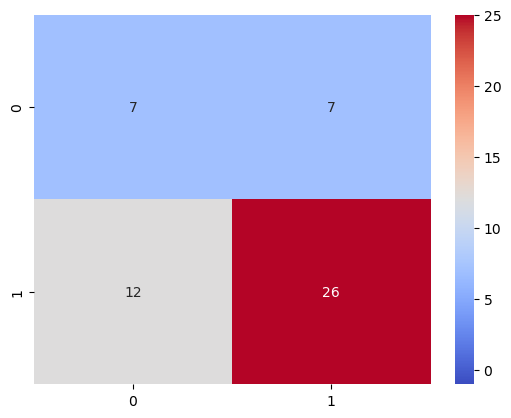

In [158]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), vmin = -1, vmax = +25, annot = True, cmap = 'coolwarm')

# ADASYN

In [183]:
from imblearn.over_sampling import ADASYN
sm = ADASYN()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train.ravel())

X_resampled.shape, y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  315
size of 1st class  340


In [196]:
#creating the model based on best parmaters which we got it earlier
from sklearn.metrics import accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(500,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(50,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 150)

# Fitting the model

model.fit(X_resampled, y_resampled)

# Predicting using trained model

y_predict = model.predict(X_test)

# Printing the metrics
print(accuracy_score(y_test,y_predict))

2/2 [==============================] - 0s 0s/step
0.6346153846153846


In [199]:
print(classification_report(y_test,model.predict(X_test)))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.74      0.76      0.75        38

    accuracy                           0.63        52
   macro avg       0.53      0.52      0.52        52
weighted avg       0.63      0.63      0.63        52



2/2 [==============================] - 0s 0s/step


<AxesSubplot:>

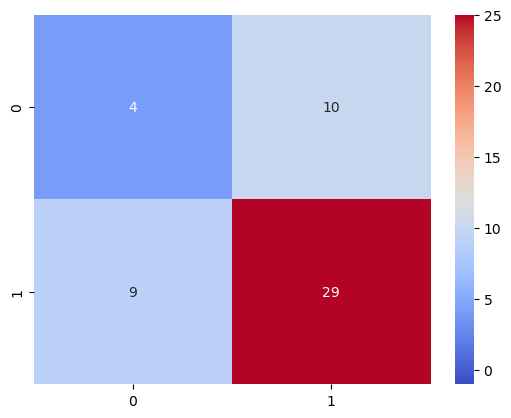

In [200]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), vmin = -1, vmax = +25, annot = True, cmap = 'coolwarm')